In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("household_energy_consumption.csv", parse_dates=["Date"])

print(df.head())

print(df.info())

print(df.isnull().sum())



  Household_ID       Date  Energy_Consumption_kWh  Household_Size  \
0       H00001 2025-04-01                     8.4               4   
1       H00001 2025-04-02                     7.9               4   
2       H00001 2025-04-03                     9.2               4   
3       H00001 2025-04-04                     7.9               4   
4       H00001 2025-04-05                     9.6               4   

   Avg_Temperature_C Has_AC  Peak_Hours_Usage_kWh  
0               17.8     No                   3.2  
1               17.3     No                   2.8  
2               18.6     No                   3.0  
3               18.2     No                   2.7  
4               11.9     No                   3.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Household_ID            90000 non-null  

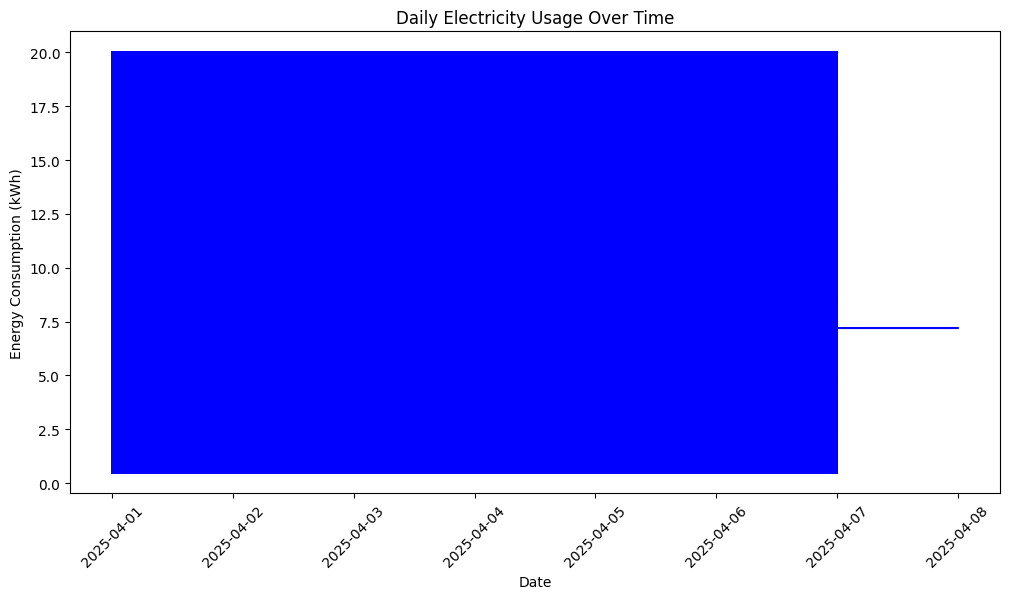

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Energy_Consumption_kWh"], color="blue")
plt.title("Daily Electricity Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.xticks(rotation=45)
plt.show()


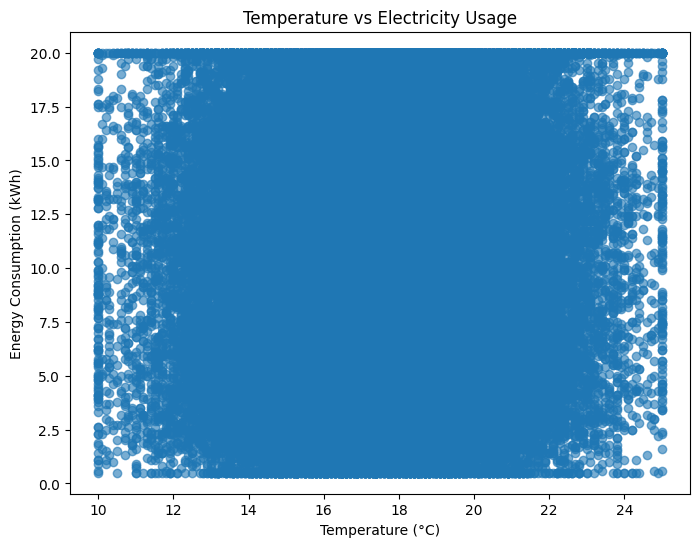

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df["Avg_Temperature_C"], df["Energy_Consumption_kWh"], alpha=0.6)
plt.title("Temperature vs Electricity Usage")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.show()


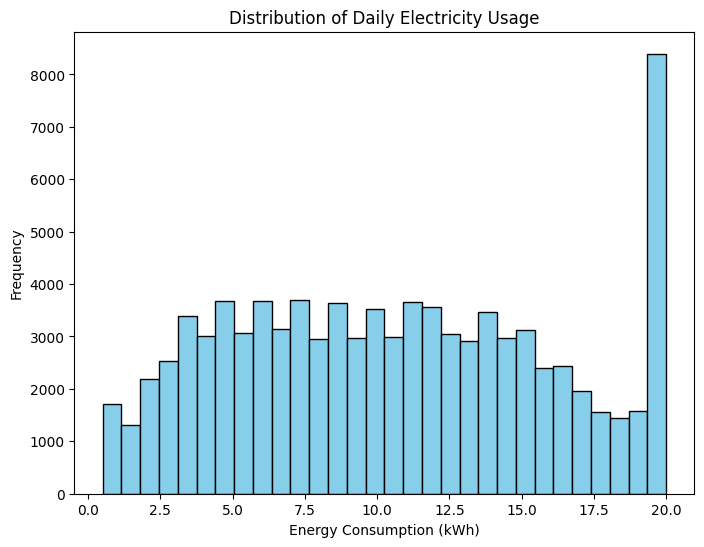

In [13]:
plt.figure(figsize=(8,6))
plt.hist(df["Energy_Consumption_kWh"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Daily Electricity Usage")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()


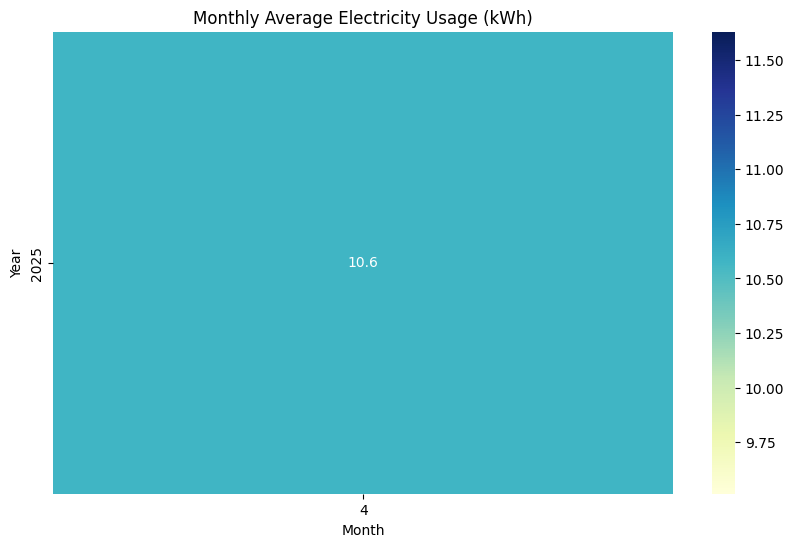

In [14]:
import seaborn as sns

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

monthly_usage = df.groupby(["Year","Month"])["Energy_Consumption_kWh"].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(monthly_usage, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Monthly Average Electricity Usage (kWh)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv("household_energy_consumption.csv", parse_dates=["Date"])

from ipywidgets import interact

def dashboard(ac_filter="All"):
    if ac_filter != "All":
        filtered_df = df[df["Has_AC"] == ac_filter]
    else:
        filtered_df = df

    # 1. Line chart: Usage over time
    fig1 = px.line(filtered_df, x="Date", y="Energy_Consumption_kWh",
                   title="Electricity Usage Over Time")
    fig1.show()

    # 2. Scatter plot: Temp vs Usage
    fig2 = px.scatter(filtered_df, x="Avg_Temperature_C", y="Energy_Consumption_kWh",
                      title="Temperature vs Electricity Usage", opacity=0.6)
    fig2.show()

    # 3. Histogram: Daily usage
    fig3 = px.histogram(filtered_df, x="Energy_Consumption_kWh", nbins=30,
                        title="Distribution of Daily Electricity Usage")
    fig3.show()

    # 4. Heatmap: Monthly Avg Usage
    filtered_df["YearMonth"] = filtered_df["Date"].dt.to_period("M")
    monthly_usage = filtered_df.groupby("YearMonth")["Energy_Consumption_kWh"].mean().reset_index()
    fig4 = go.Figure(data=go.Heatmap(
        z=monthly_usage["Energy_Consumption_kWh"],
        x=monthly_usage["YearMonth"].astype(str),
        y=["Usage"]*len(monthly_usage),  # single row heatmap
        colorscale="YlGnBu"
    ))
    fig4.update_layout(title="Monthly Average Electricity Usage (kWh)",
                       xaxis_title="Month", yaxis_title="")
    fig4.show()

interact(dashboard, ac_filter=["All", "Yes", "No"])
